In [1]:
import urllib.request
f = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/ae/Seoul_districts.svg')
print(f.read()) 

b'<?xml version="1.0" encoding="utf-8"?>\r\n<!-- Generator: Adobe Illustrator 15.1.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  -->\r\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\r\n<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"\r\n\t width="1400px" height="1400px" viewBox="0 0 1400 1400" enable-background="new 0 0 1400 1400" xml:space="preserve">\r\n<path id="Dobong-gu" fill-rule="evenodd" clip-rule="evenodd" fill="#C8C8C8" d="M964.064,164.667\r\n\tc-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003\r\n\tc-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505\r\n\tc0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008\r\n\tc-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.55

In [2]:
import urllib.request
import json
import pandas as pd
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [3]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = ('data/seoul_municipalities_geo.json')

In [4]:
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [5]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'SIG_CD': '11320',
    'SIG_KOR_NM': '도봉구',
    'SIG_ENG_NM': 'Dobong-gu',
    'ESRI_PK': 0,
    'SHAPE_AREA': 0.00211,
    'SHAPE_LEN': 0.239901},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.019851357, 37.700884901999984],
      [127.02217147700003, 37.69960736799999],
      [127.02341184299996, 37.69995983299998],
      [127.02533791899998, 37.69948105499998],
      [127.02692041600005, 37.70015310500003],
      [127.02704481599994, 37.701011506999976],
      [127.02771004600004, 37.700837447000026],
      [127.02823835000004, 37.700188083],
      [127.02833534499996, 37.700068851000026],
      [127.02901307699995, 37.69957318899998],
      [127.02930740500005, 37.699210467],
      [127.02962280199995, 37.698103651999986],
      [127.02967567200005, 37.69773805400001],
      [127.02975002699998, 37.69621560600001],
      [127.03018658500002, 37.69515116600002],
      [127.03047411600005

In [6]:
import csv
import requests
from bs4 import BeautifulSoup

In [7]:
df_map = pd.read_csv("data/df_map.csv")
df_map.head()

FileNotFoundError: File b'project/m3/danger.csv' does not exist

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
geo_df = df

map = folium.Map(location=[geo_df['lat'].mean(), geo_df['lon'].mean()], zoom_start=17, tiles='Stamen Toner')
map

NameError: name 'df' is not defined

In [11]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=closing,
              columns=['country','count'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.properties.SIG_KOR_NM',
              highlight=True
              )
map

NameError: name 'closing' is not defined

In [13]:
closing['count'] = closing['count'].astype(str)

NameError: name 'closing' is not defined

In [71]:
closing

country count
0      강동구   3.3
1      송파구   3.4
2      강남구   3.2
3      서초구   2.8
4      관악구   3.6
5      동작구   3.5
6     영등포구   3.2
7      금천구   3.2
8      구로구   3.2
9      강서구   3.4
10     양천구   3.7
11     마포구   4.0
12    서대문구   3.2
13     은평구   3.5
14     노원구   3.4
15     도봉구   3.1
16     강북구   3.4
17     성북구   3.0
18     중랑구   3.4
19    동대문구   3.3
20     광진구   3.3
21     성동구   3.0
22     용산구   3.0
23      중구   2.5
24     종로구   2.9

In [67]:
closing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
country    25 non-null object
count      25 non-null object
dtypes: object(2)
memory usage: 480.0+ bytes


In [61]:
closing.head()

country  count
0     강동구    3.3
1     송파구    3.4
2     강남구    3.2
3     서초구    2.8
4     관악구    3.6

In [12]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
               data = closing['count'],
               columns = [closing.index,closing['count']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [16]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=7, tiles='Mapbox Bright')
map.choropleth(
  geo_data=geo_str,
  data=df,
  columns=['시군구_코드_명', '폐업신고율'],
  key_on='feature.properties.code',
  fill_color='PuRd',
  fill_opacity=1.0,
  line_opacity=0.2,
  legend_name='Random',
)
map

In [15]:

map = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
               data = closing['count'],
               columns = [closing.index,closing['count']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map





map = folium.Map(location=[37.5502, 126.982], zoom_start=7, tiles='Mapbox Bright')
map.choropleth(
  geo_data=geo_str,
  data=df,
  columns=['시군구_코드_명', '폐업신고율'],
  key_on='feature.properties.code',
  fill_color='PuRd',
  fill_opacity=1.0,
  line_opacity=0.2,
  legend_name='Random',
)
map

In [8]:
map.choropleth?

In [72]:
closing = pd.read_csv("project/m3/closing.csv", encoding = 'UTF-8')

In [11]:
closing

country  count
0      강동구    3.3
1      송파구    3.4
2      강남구    3.2
3      서초구    2.8
4      관악구    3.6
5      동작구    3.5
6     영등포구    3.2
7      금천구    3.2
8      구로구    3.2
9      강서구    3.4
10     양천구    3.7
11     마포구    4.0
12    서대문구    3.2
13     은평구    3.5
14     노원구    3.4
15     도봉구    3.1
16     강북구    3.4
17     성북구    3.0
18     중랑구    3.4
19    동대문구    3.3
20     광진구    3.3
21     성동구    3.0
22     용산구    3.0
23      중구    2.5
24     종로구    2.9

In [13]:
df.head(10)

기준_년월_코드  시군구_코드 시군구_코드_명  신규_창업_위험_지수_구간_코드 신규_창업_위험_지수_구간_코드_명  폐업신고율  \
0    201803   11740      강동구                3.0                  의심    3.3   
1    201803   11710      송파구                4.0                  주의    3.4   
2    201803   11680      강남구                3.0                  의심    3.2   
3    201803   11650      서초구                3.0                  의심    2.8   
4    201803   11620      관악구                3.0                  의심    3.6   
5    201803   11590      동작구                3.0                  의심    3.5   
6    201803   11560     영등포구                3.0                  의심    3.2   
7    201803   11545      금천구                3.0                  의심    3.2   
8    201803   11530      구로구                3.0                  의심    3.2   
9    201803   11500      강서구                3.0                  의심    3.4   

   3년 간 개업 대비 폐업신고율  평균 폐업기간  점포증감률  신규_창업_위험_지수_값        lat         lon  
0             104.5      3.0   -1.6           47.3  37.549208  127.146482  
1              92.5      3.0    0.9           37.5  37.504853  127.114482  
2              96.8      2.9    0.3           43.0  37.495985  127.066409  
3              98.6      3.1   -0.1           41.9  37.476953  127.037810  
4              98.5      3.0   -1.0           41.3  37.465399  126.943807  
5              97.4      3.1    0.5           48.9  37.496504  126.944307  
6              99.8      3.1   -1.0           47.2  37.520641  126.913924  
7             100.8      3.1   -1.1           45.0  37.460097  126.900155  
8              94.2      3.0   -0.3           43.1  37.495486  126.858121  
9              88.2      2.9    2.0           43.6  37.565762  126.822656

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
기준_년월_코드               400 non-null int64
시군구_코드                 400 non-null int64
시군구_코드_명               400 non-null object
신규_창업_위험_지수_구간_코드      300 non-null float64
신규_창업_위험_지수_구간_코드_명    300 non-null object
폐업신고율                  300 non-null float64
3년 간 개업 대비 폐업신고율       300 non-null float64
평균 폐업기간                300 non-null float64
점포증감률                  300 non-null float64
신규_창업_위험_지수_값          300 non-null float64
lat                    400 non-null float64
lon                    400 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 37.6+ KB


In [18]:
closing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
country    25 non-null object
count      25 non-null float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [ ]:
df

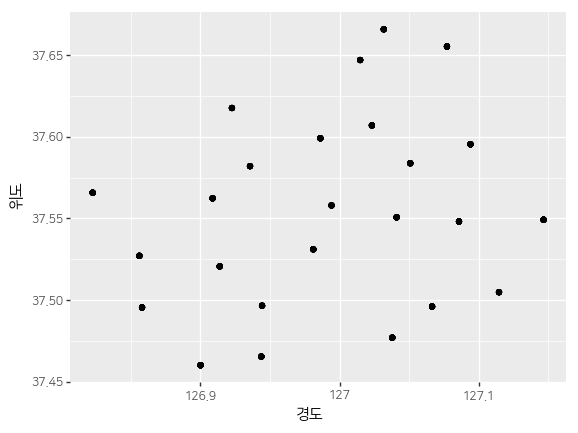

<ggplot: (116109731648)>

In [21]:
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='Nanumsquare'))
)


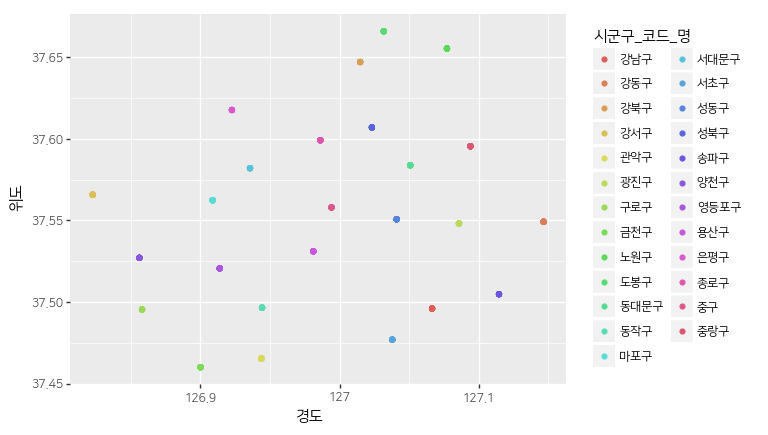

<ggplot: (-9223371920744736533)>

In [26]:
(ggplot(df)
 + aes(x='경도', y='위도', color='시군구_코드_명')
 + geom_point()
 + theme(text=element_text(family='Nanumsquare'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')